In [21]:
# 📦 Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Enable inline plotting
%matplotlib inline

# ✅ Optional: Apply Seaborn-style plots if available
try:
    plt.style.use("seaborn-v0_8")  # for matplotlib 3.6+
except:
    plt.style.use("ggplot")        # fallback style

In [23]:
# 📊 Step 2: Load result CSV
df = pd.read_csv("../plots/strangle_results.csv", parse_dates=["date"])
df.sort_values("date", inplace=True)
df.head()

,date,pnl
0,2019-07-01,139.61
1,2019-07-02,63.41
2,2019-07-03,157.72
3,2019-07-04,262.76
4,2019-07-05,51.90


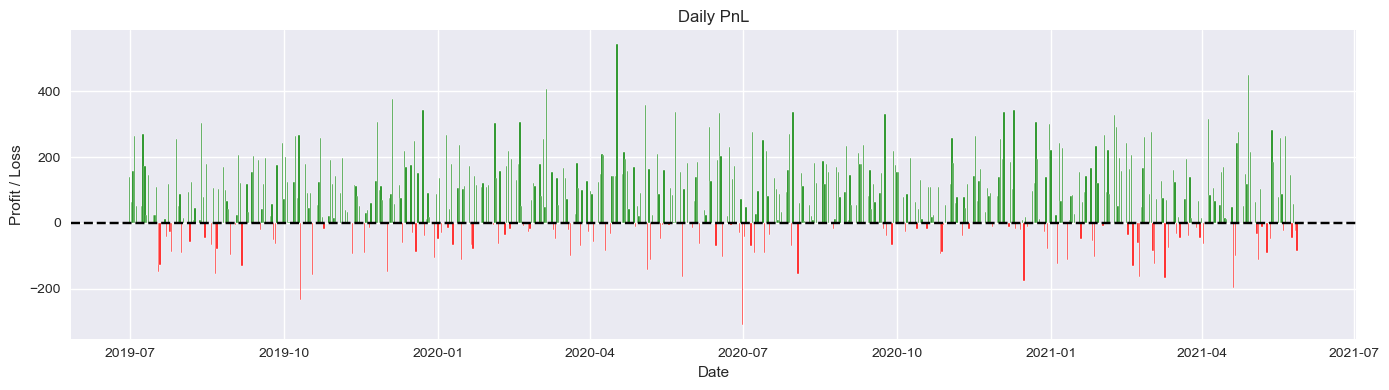

In [25]:
# 📈 Step 3: Plot Daily PnL
plt.figure(figsize=(14, 4))
plt.bar(df['date'], df['pnl'], color=["green" if x > 0 else "red" for x in df['pnl']])
plt.axhline(0, color="black", linestyle="--")
plt.title("Daily PnL")
plt.xlabel("Date")
plt.ylabel("Profit / Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

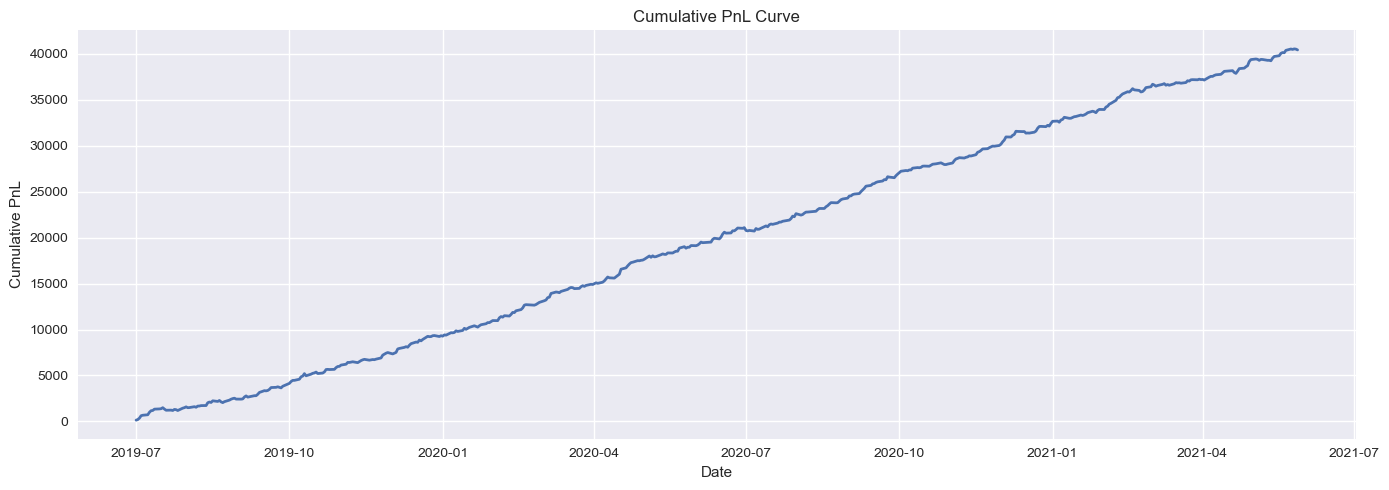

In [26]:
# 📈 Step 4: Cumulative PnL Curve
df["cum_pnl"] = df["pnl"].cumsum()

plt.figure(figsize=(14, 5))
plt.plot(df["date"], df["cum_pnl"], label="Cumulative PnL", linewidth=2)
plt.title("Cumulative PnL Curve")
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# 📊 Step 5: Key Stats
total_days = len(df)
profitable_days = len(df[df["pnl"] > 0])
win_rate = profitable_days / total_days * 100
total_pnl = df["pnl"].sum()

# Max Drawdown
df["roll_max"] = df["cum_pnl"].cummax()
df["drawdown"] = df["roll_max"] - df["cum_pnl"]
max_dd = df["drawdown"].max()

print(f"Total PnL: ₹{total_pnl:.2f}")
print(f"Total Days: {total_days}")
print(f"Win Rate: {win_rate:.2f}%")
print(f"Max Drawdown: ₹{max_dd:.2f}")

Total PnL: ₹40410.33
Total Days: 500
Win Rate: 74.00%
Max Drawdown: ₹371.92
